<a href="https://colab.research.google.com/github/chetana2003/Html-files/blob/main/SMS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Dataset/spam.csv', delimiter=',',encoding='latin-1') #Call to the data
df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'],axis=1,inplace=True) #Dropping not useable columns
df.sample(10) #random 10 rows

,v1,v2
498,ham,"Kate jackson rec center before 7ish, right?"
4077,ham,Gam gone after outstanding innings.
2323,ham,Sorry dude. Dont know how i forgot. Even after...
69,ham,I plane to give on this month end.
3791,ham,Love it! I want to flood that pretty pussy wit...
4932,ham,Once free call me sir.
297,ham,Hurt me... Tease me... Make me cry... But in t...
4944,ham,Anyway I don't think I can secure anything up ...
3870,ham,Yeah my usual guy's out of town but there're d...
5127,ham,Cuz ibored. And don wanna study


In [ ]:
df.info() #Info of Dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [ ]:
df["v1"] = (df["v1"] == "spam").astype(int)

In [ ]:
x, y=df['v2'].values,df['v1'].values

In [ ]:
x = x.tolist()
vectorizer = CountVectorizer()
x = vectorizer.fit_transform(x)

In [ ]:
train_x,test_x, train_y, test_y = train_test_split(x, y, test_size=0.2, random_state=2)

In [ ]:
knn_model = KNeighborsClassifier()
knn_model.fit(train_x, train_y)

test_pre = knn_model.predict(test_x)

In [ ]:
print(classification_report(test_y, test_pre))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95       957
           1       1.00      0.39      0.56       158

    accuracy                           0.91      1115
   macro avg       0.95      0.69      0.75      1115
weighted avg       0.92      0.91      0.90      1115



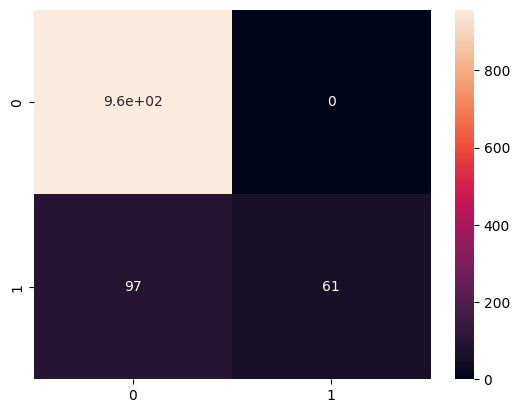

In [ ]:
sns.heatmap(confusion_matrix(test_y, test_pre), annot=True)
plt.show()